In [1]:
!pip install git+https://github.com/mozilla-ai/osm-ai-helper.git

  Cloning https://github.com/mozilla-ai/osm-ai-helper.git to /tmp/pip-req-build-0mqyno08
  Running command git clone --filter=blob:none --quiet https://github.com/mozilla-ai/osm-ai-helper.git /tmp/pip-req-build-0mqyno08
  Resolved https://github.com/mozilla-ai/osm-ai-helper.git to commit 4d3b48293a5884ed98d20cfba0b34b83e98afa10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 9.3 MB/s eta 0:00:00
  Created wheel for osm-

In [2]:
from osm_ai_helper.download_osm import download_osm

In [3]:
AREA = "Ponteareas"

download_osm(
    area=AREA,
    output_dir="dataset",
    selector="leisure=swimming_pool",
    discard={"location": "indoor"},
)

2025-02-11 15:56:20.462 | INFO     | osm_ai_helper.download_osm:download_osm:39 - Downloading osm data for Ponteareas
2025-02-11 15:56:22.082 | INFO     | osm_ai_helper.download_osm:download_osm:47 - Writing 103 elements to dataset/Ponteareas.json
2025-02-11 15:56:22.090 | SUCCESS  | osm_ai_helper.download_osm:download_osm:49 - Done!


In [4]:
from osm_ai_helper.group_elements_and_download_tiles import (
    group_elements_and_download_tiles,
)

In [5]:
import os

os.environ["MAPBOX_TOKEN"] = (
    "pk.eyJ1IjoiZGF2aWRkZWxhaWdsZXNpYSIsImEiOiJjajJpdnk2cnMwMXh3MnByN3pjcDJ3MXg1In0.U16sxCaYkCZ_LQAN0vRipg"
)

In [6]:
group_elements_and_download_tiles(
    "dataset/Ponteareas.json",
    "dataset/Ponteareas",
)

2025-02-11 15:56:22.125 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:38 - Grouping elements by tile
2025-02-11 15:56:22.148 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:43 - Downloading tiles and writing annotation
2025-02-11 15:56:22.152 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:46 - Processed 0/70 tiles
2025-02-11 15:56:27.492 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:46 - Processed 50/70 tiles


In [7]:
from osm_ai_helper.convert_to_vlm_dataset import convert_to_vlm_dataset

In [8]:
dataset = convert_to_vlm_dataset(
    "dataset/Ponteareas", "Point to the swimming pools in the image."
)

In [9]:
from osm_ai_helper.utils.plots import show_vlm_entry

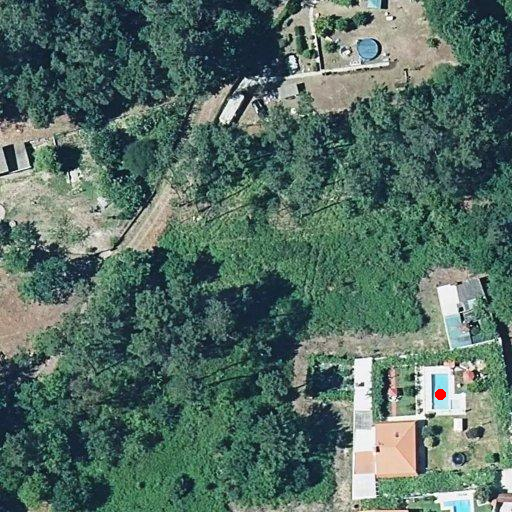

In [10]:
show_vlm_entry(dataset[4])

In [11]:
%%capture
# Normally using pip install unsloth is enough

# Temporarily as of Jan 31st 2025, Colab has some issues with Pytorch
# Using pip install unsloth will take 3 minutes, whilst the below takes <1 minute:
!pip install --no-deps bitsandbytes accelerate xformers==0.0.29 peft trl triton
!pip install --no-deps cut_cross_entropy unsloth_zoo
!pip install sentencepiece protobuf datasets huggingface_hub hf_transfer
!pip install --no-deps unsloth

In [12]:
from unsloth import FastVisionModel
import torch

model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Qwen2-VL-7B-Instruct",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.2.5: Fast Qwen2_Vl vision patching. Transformers: 4.48.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/6.36G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [13]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 16,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

Unsloth: Making `model.base_model.model.visual` require gradients


In [15]:
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

FastVisionModel.for_training(model) # Enable for training!

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
    train_dataset = dataset,
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 30,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",     # For Weights and Biases

        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 2048,
    ),
)

In [16]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 70 | Num Epochs = 4
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 30
 "-____-"     Number of trainable parameters = 50,855,936
🦥 Unsloth needs about 1-3 minutes to load everything - please wait!


TypeError: list indices must be integers or slices, not str